In [2]:
import warnings
import pandas as pd
import numpy as np
import riskfolio as rp
from openbb_terminal.sdk import openbb
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns

In [3]:
#Use the OpenBB SDK to pull closing price data for the past 10 years
start = '2013-02-13'
end = '2023-02-13'

symbols = ["SPY", "COST", "AVGO", "APD", "AMGN", "CVX", "AAPL", "DIS",
          "BAC", "GS", "SBUX", "COF", "ETN", "XOM", "HD", "MA",
          "QQQ", "IWM", "JNJ", "JPM", "MCD", "MRK", "MSFT", "NVDA", "NKE",
          "PEP", "PFE", "PG", "MO", "BUD", "SHW", "TSCO", "UNH", "VZ", "V", "WMT"]

data = openbb.economy.index(symbols, start_date=start, end_date=end)
data

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-13 00:00:00-05:00,126.366142,83.569153,26.767317,64.430977,65.351997,76.319016,14.405277,49.963741,10.341105,130.554367,...,17.901686,57.207512,19.707800,68.738289,50.024681,45.482624,49.074024,28.145348,36.090046,57.176167
2013-02-14 00:00:00-05:00,126.482376,83.889862,27.125036,64.365631,65.182724,76.437927,14.392321,49.891014,10.307118,131.745636,...,17.941456,57.371899,19.328152,72.242966,49.486488,45.769367,48.919674,28.025232,36.372208,56.719643
2013-02-15 00:00:00-05:00,126.332870,84.013206,26.744490,64.031792,64.328712,75.942482,14.193985,50.554661,10.222143,130.951477,...,18.093966,57.192577,19.481140,72.219612,50.402611,45.778198,49.151203,28.069490,36.840912,55.502270
2013-02-19 00:00:00-05:00,127.279724,83.791176,27.048918,64.372917,64.728806,76.576637,14.188738,50.663750,10.358099,134.043762,...,18.372435,57.820232,19.702131,72.499969,49.616497,45.632633,48.585262,28.132698,36.752296,55.069778
2013-02-20 00:00:00-05:00,125.693367,83.116928,26.386778,63.581844,65.128868,75.962288,13.845117,49.636475,10.026708,131.112000,...,18.279610,57.596073,19.770132,72.328629,48.174259,44.803257,47.341892,28.398214,36.241623,55.430199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,409.829987,515.590027,601.299988,283.029999,241.718353,168.153488,151.498688,109.870003,36.369999,370.799988,...,43.759998,141.399994,46.959999,58.730000,243.029999,232.419998,475.239990,41.279999,228.991501,140.679993
2023-02-07 00:00:00-05:00,415.190002,516.530029,614.450012,285.070007,241.867035,172.564484,154.414230,111.629997,36.770000,374.399994,...,43.590000,140.020004,46.560001,58.419998,238.440002,232.729996,476.880005,40.549999,230.867828,140.979996
2023-02-08 00:00:00-05:00,410.649994,503.809998,601.710022,287.239990,238.100250,168.510330,151.688400,111.779999,36.500000,375.100006,...,43.980000,138.570007,46.500000,58.200001,235.509995,231.240005,483.220001,40.520000,229.750000,140.220001


In [4]:
#Calc the daily returns using the .pct_change function
returns = data.pct_change().dropna()
returns

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-14 00:00:00-05:00,0.000920,0.003838,0.013364,-0.001014,-0.002590,0.001558,-0.000899,-0.001456,-0.003287,0.009125,...,0.002222,0.002874,-0.019264,0.050986,-0.010759,0.006304,-0.003145,-0.004268,0.007818,-0.007985
2013-02-15 00:00:00-05:00,-0.001182,0.001470,-0.014029,-0.005187,-0.013102,-0.006482,-0.013781,0.013302,-0.008244,-0.006028,...,0.008500,-0.003126,0.007915,-0.000323,0.018513,0.000193,0.004733,0.001579,0.012886,-0.021463
2013-02-19 00:00:00-05:00,0.007495,-0.002643,0.011383,0.005327,0.006220,0.008350,-0.000370,0.002158,0.013300,0.023614,...,0.015390,0.010974,0.011344,0.003882,-0.015597,-0.003180,-0.011514,0.002252,-0.002405,-0.007792
2013-02-20 00:00:00-05:00,-0.012464,-0.008047,-0.024479,-0.012289,0.006181,-0.008023,-0.024218,-0.020276,-0.031993,-0.021872,...,-0.005052,-0.003877,0.003451,-0.002363,-0.029068,-0.018175,-0.025592,0.009438,-0.013895,0.006545
2013-02-21 00:00:00-05:00,-0.006079,-0.003858,-0.028844,-0.022144,0.005671,0.000000,-0.006216,-0.007876,-0.032203,-0.027710,...,-0.005803,-0.000519,0.008885,-0.008722,-0.018384,-0.004637,0.000544,0.004452,0.012997,0.015171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 00:00:00-05:00,-0.006111,0.001535,0.006158,-0.006982,-0.005384,0.001121,-0.017929,-0.007587,-0.001647,0.002298,...,-0.006809,-0.008485,0.001066,-0.007772,0.005378,0.016888,0.006822,-0.005541,-0.002998,-0.007268
2023-02-07 00:00:00-05:00,0.013079,0.001823,0.021869,0.007208,0.000615,0.026232,0.019245,0.016019,0.010998,0.009709,...,-0.003885,-0.009759,-0.008518,-0.005278,-0.018887,0.001334,0.003451,-0.017684,0.008194,0.002133
2023-02-08 00:00:00-05:00,-0.010935,-0.024626,-0.020734,0.007612,-0.015574,-0.023494,-0.017653,0.001344,-0.007343,0.001870,...,0.008947,-0.010356,-0.001289,-0.003766,-0.012288,-0.006402,0.013295,-0.000740,-0.004842,-0.005391


In [5]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = returns.corr()
correlation.head()

,SPY,COST,AVGO,APD,AMGN,CVX,AAPL,DIS,BAC,GS,...,PFE,PG,MO,BUD,SHW,TSCO,UNH,VZ,V,WMT
SPY,1.000000,0.608160,0.668049,0.693016,0.570142,0.628123,0.719935,0.673609,0.720520,0.750626,...,0.523976,0.565727,0.479139,0.547286,0.626597,0.522275,0.629447,0.475532,0.767353,0.453606
COST,0.608160,1.000000,0.377855,0.414306,0.359313,0.259594,0.463021,0.355640,0.319033,0.374683,...,0.337557,0.482418,0.318428,0.261684,0.398854,0.449113,0.390949,0.357311,0.426754,0.566400
AVGO,0.668049,0.377855,1.000000,0.439877,0.364005,0.396397,0.565675,0.416192,0.444839,0.478857,...,0.290153,0.291972,0.259449,0.373356,0.443967,0.358696,0.388558,0.233513,0.509626,0.233887
APD,0.693016,0.414306,0.439877,1.000000,0.420317,0.462720,0.432988,0.455892,0.519289,0.527112,...,0.391120,0.445555,0.377382,0.414861,0.519332,0.357681,0.463859,0.367115,0.551613,0.330849
AMGN,0.570142,0.359313,0.364005,0.420317,1.000000,0.307524,0.370575,0.330811,0.388916,0.391262,...,0.491406,0.420546,0.301813,0.292932,0.385790,0.317919,0.463935,0.344207,0.432141,0.328034


<AxesSubplot: >

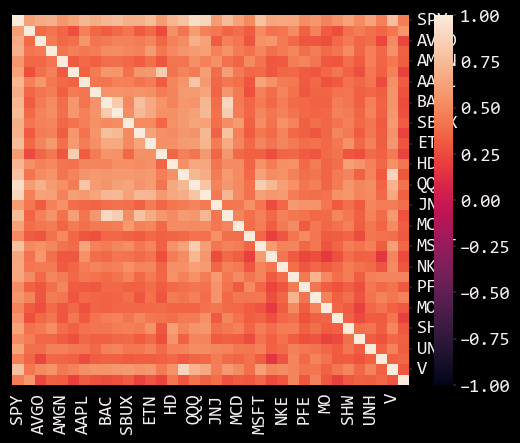

In [6]:
# Use heatmap to visualize the correlation of the stocks in the portfolio
sns.heatmap(correlation, vmin=-1, vmax=1)

In [7]:
#weight the portfolio (0.0285 = equal wt for 35 stocks)
#weight the portfolio
portfolio_weighted_returns = ((returns["COST"]*.0059) + (returns["AVGO"]*.0088) + (returns["APD"]*.0066) + (returns["AMGN"]*.0029) + (returns["CVX"]*.0191) + 
        (returns["AAPL"]*.0125) + (returns["DIS"]*.1366) + (returns["BAC"]*.1109) + (returns["GS"]*.0044) + (returns["SBUX"]*.0389) + 
        (returns["COF"]*.0132) + (returns["ETN"]*.0264) + (returns["XOM"]*.0345) + (returns["HD"]*.0066) + (returns["MA"]*.0125) + 
        (returns["QQQ"]*.0800) + (returns["IWM"]*.0352) + (returns["JNJ"]*.0184) + (returns["JPM"]*.0228) + (returns["MCD"]*.0330) + 
        (returns["MRK"]*.0081) + (returns["MSFT"]*.0213) + (returns["NVDA"]*.1043) + (returns["NKE"]*.0264) + (returns["PEP"]*.0110) + 
        (returns["PFE"]*.0404) + (returns["PG"]*.0125) + (returns["MO"]*.0162) + (returns["BUD"]*.0360) + (returns["SHW"]*.0073) + 
        (returns["TSCO"]*.0492) + (returns["UNH"]*.0066) + (returns["VZ"]*.0235) + (returns["V"]*.0081) + (returns["WMT"]*.0132)
        
            )
portfolio_weighted_returns.head()

Date
2013-02-14 00:00:00-05:00    0.004757
2013-02-15 00:00:00-05:00   -0.000332
2013-02-19 00:00:00-05:00    0.003672
2013-02-20 00:00:00-05:00   -0.014489
2013-02-21 00:00:00-05:00   -0.008416
dtype: float64

<AxesSubplot: title={'left': 'Mike Portfolio Daily Returns'}, xlabel='Date'>

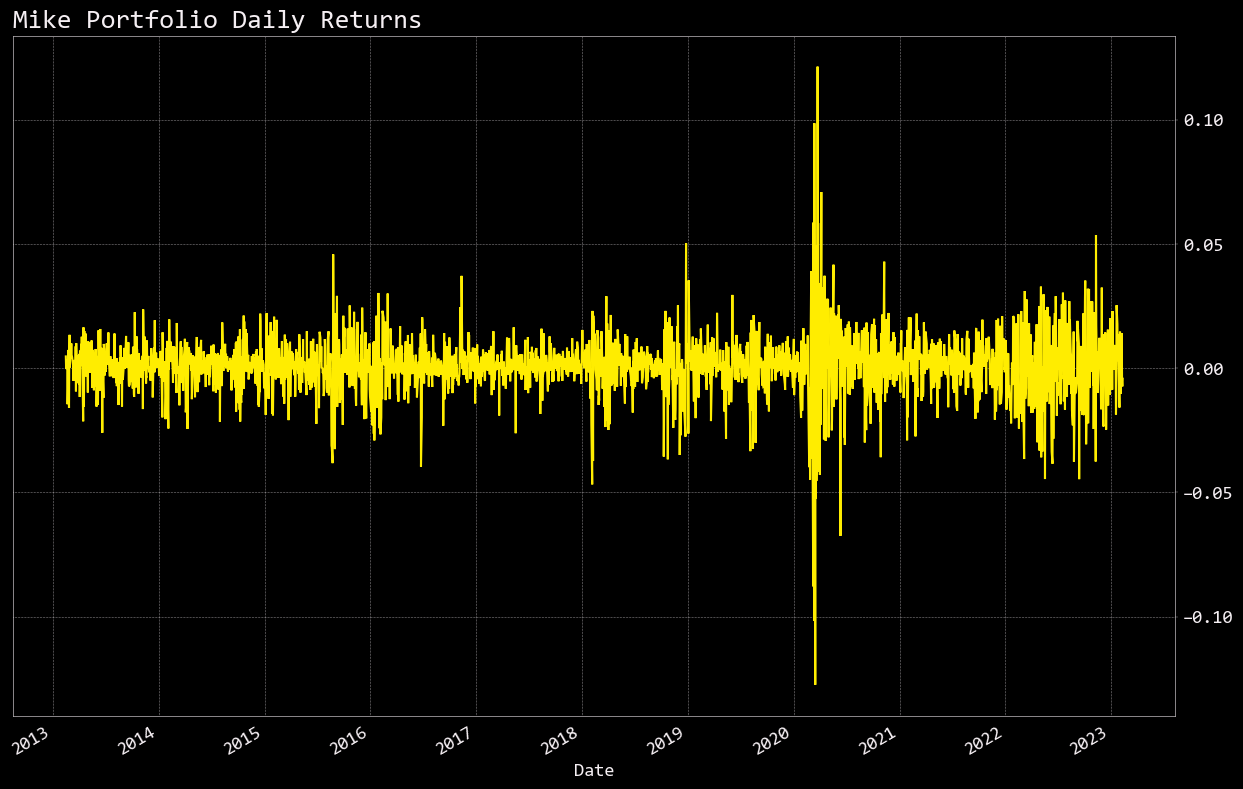

In [8]:
#Daily returns of the portfolio
portfolio_weighted_returns.plot(
    title = "Mike Portfolio Daily Returns",
    figsize = (15, 10)
)

<AxesSubplot: title={'left': 'Mike Portfolio Cumulative Returns'}, xlabel='Date', ylabel='Cumulative Returns'>

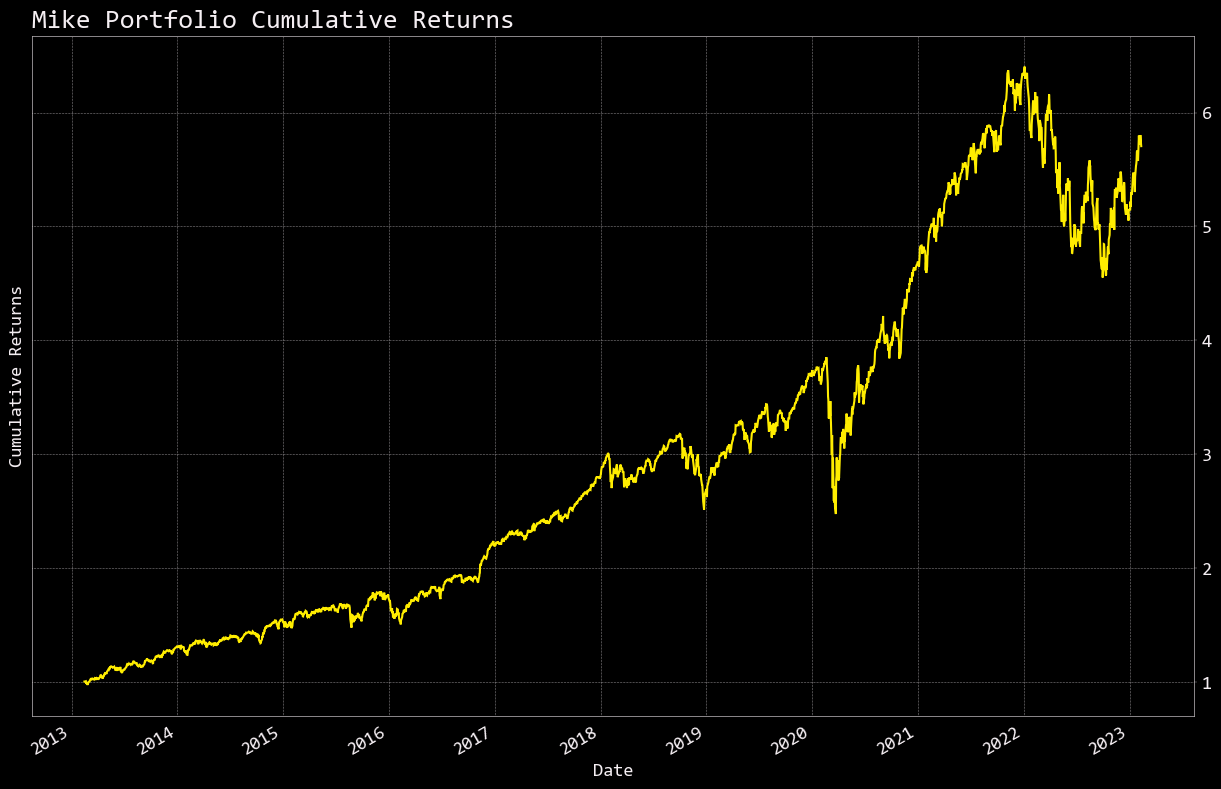

In [9]:
#Cumulative returns of the weighted portfolio
cum_returns = (1 + portfolio_weighted_returns).cumprod()
cum_returns.plot(
    title = "Mike Portfolio Cumulative Returns",
    figsize = (15, 10),
    ylabel = "Cumulative Returns"
)

<AxesSubplot: title={'left': 'Mike Portfolio 10k Basis'}, xlabel='Date'>

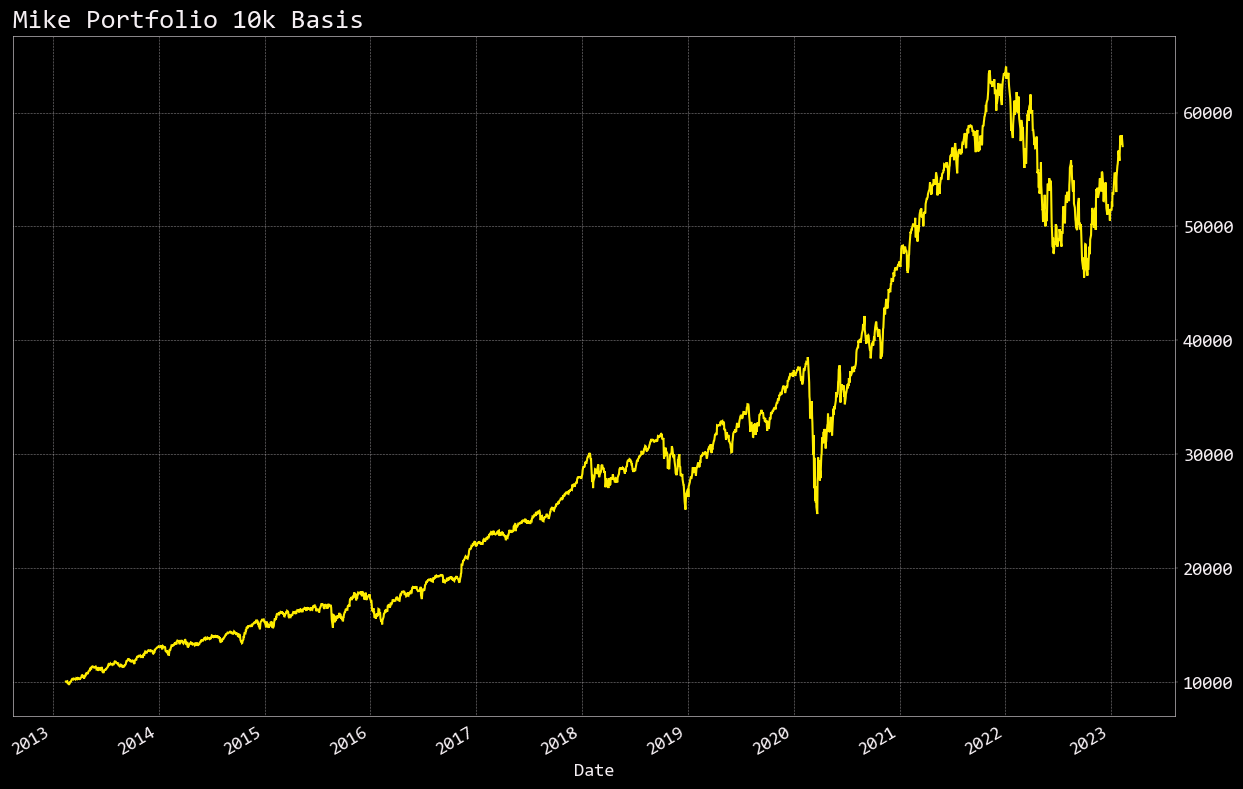

In [10]:
#cumulative returns for 10k investment
initial_investment = 10000
cum_returns = (1 + portfolio_weighted_returns).cumprod()
(initial_investment * cum_returns).plot(
    title = "Mike Portfolio 10k Basis",
    figsize = (15, 10)
)

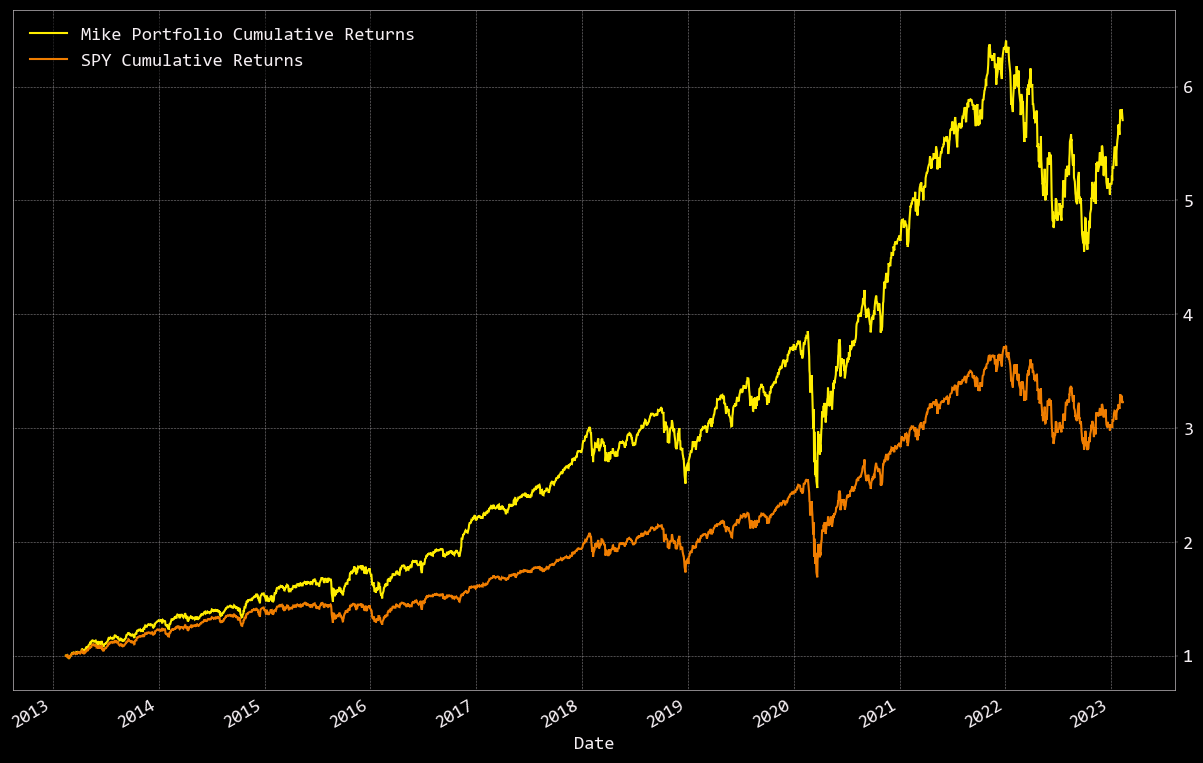

In [11]:
#Pull out the spy and look at its returns as a comparison
spy_returns = returns["SPY"]
spy_cum_returns = (1 + spy_returns).cumprod()

ax = cum_returns.plot(figsize = (15,10))
spy_cum_returns.plot(ax=ax)
ax.legend(["Mike Portfolio Cumulative Returns", "SPY Cumulative Returns"])

In [12]:
# Summary stats of portfolio vs SPY

portfolio_summary_stats = openbb.qa.summary(portfolio_weighted_returns)
spy_summary_stats = openbb.qa.summary(spy_returns)
summary_stats = pd.concat([portfolio_summary_stats, spy_summary_stats], axis="columns", join = "inner")
summary_stats

,0,SPY
count,2516.000000,2516.000000
mean,0.000768,0.000527
std,0.012254,0.010989
min,-0.127426,-0.109424
10%,-0.011740,-0.010631
25%,-0.003992,-0.003642
50%,0.000907,0.000644
75%,0.006281,0.005608
90%,0.012817,0.011563
max,0.121415,0.090603


In [65]:
#Get an overview of the stocks in the portfolio sorted by market cap
mike_portfolio_overview = openbb.stocks.ca.screener(similar = symbols, data_type = "overview").sort_values(by = ["Market Cap"], ascending = False)
mike_portfolio_overview

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2.421680e+12,26.03,153.20,-0.0042,60318993.0
20,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,USA,2.029990e+12,30.26,272.17,0.0031,36936877.0
22,NVDA,NVIDIA Corporation,Technology,Semiconductors,USA,5.935700e+11,97.71,229.71,0.0543,67249235.0
32,V,Visa Inc.,Financial,Credit Services,USA,4.766000e+11,32.06,229.39,0.0022,4767058.0
35,XOM,Exxon Mobil Corporation,Energy,Oil & Gas Integrated,USA,4.600300e+11,8.77,116.42,-0.0117,11967551.0
31,UNH,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,USA,4.525400e+11,23.26,492.83,-0.0051,2072239.0
14,JNJ,Johnson & Johnson,Healthcare,Drug Manufacturers - General,USA,4.216900e+11,24.05,162.04,-0.0044,6305378.0
15,JPM,JPMorgan Chase & Co.,Financial,Banks - Diversified,USA,4.181900e+11,11.85,143.20,0.0044,8926173.0
34,WMT,Walmart Inc.,Consumer Defensive,Discount Stores,USA,3.863500e+11,44.96,145.49,-0.0029,4610005.0
16,MA,Mastercard Incorporated,Financial,Credit Services,USA,3.571400e+11,36.20,369.96,-0.0023,1841064.0


In [66]:
#Look at the valuation data of all the stocks in the portfolio
mike_portfolio_valuation = openbb.stocks.ca.screener(similar = symbols, data_type = "valuation")
mike_portfolio_valuation

,Ticker,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
0,AAPL,2.421680e+12,26.03,23.26,3.20,6.25,42.91,47.16,29.31,0.089,0.1015,0.216,0.0813,0.115,153.20,-0.0042,60318993.0
1,AMGN,1.273800e+11,19.90,12.80,3.92,4.84,35.24,13.69,27.76,0.178,0.0589,0.020,0.0507,0.029,241.03,-0.0108,2007767.0
2,APD,6.231000e+10,27.77,22.51,3.16,4.84,4.49,19.78,NaN,0.106,0.1026,0.143,0.0879,0.092,281.49,-0.0182,1680819.0
3,AVGO,2.543100e+11,22.70,13.90,2.70,7.66,10.93,20.48,27.40,0.768,0.0664,0.458,0.0840,0.135,602.31,0.0020,1756097.0
4,BAC,2.868800e+11,11.19,9.63,3.33,3.95,1.20,0.34,NaN,0.907,0.0775,0.191,0.0336,-0.014,35.62,-0.0008,33596821.0
5,BUD,1.027200e+11,23.93,17.88,2.26,1.79,9.76,13.95,NaN,8.019,0.1380,0.274,0.1060,0.036,58.82,-0.0008,977749.0
6,COF,4.406000e+10,6.47,7.64,NaN,1.41,0.96,1.77,5.92,4.200,0.0437,0.312,-0.0660,0.024,115.35,-0.0172,2827933.0
7,COST,2.235800e+11,38.03,31.63,3.66,0.97,10.40,19.15,171.59,0.166,0.1004,0.167,0.1040,0.120,503.22,-0.0064,1254917.0
8,CVX,3.263700e+11,9.44,11.07,NaN,1.38,2.10,21.15,16.68,3.745,-0.0065,1.008,-0.0210,0.071,172.32,0.0077,7857713.0
9,DIS,2.008600e+11,59.22,19.67,2.87,2.38,2.04,23.71,2136.79,0.578,0.3249,-0.210,0.2064,0.085,107.66,0.0000,10697883.0


In [85]:
#Examine the performance metrics of the stocks in the portfolio
mike_portfolio_performance = openbb.stocks.ca.screener(similar = symbols, data_type = "performance").sort_values(by = ["Perf YTD"], ascending = False)
mike_portfolio_performance

,Ticker,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD,Volatility W,Volatility M,Recom,Avg Volume,Rel Volume,Price,Change,Volume
22,NVDA,0.0360,0.3593,0.4069,0.2070,-0.0408,0.5718,0.0543,0.0514,2.2,46530000.0,1.45,229.71,0.0543,67249235.0
6,COF,-0.0396,0.1215,-0.0077,0.0149,-0.2606,0.2409,0.0238,0.0369,2.6,3360000.0,0.84,115.35,-0.0172,2827933.0
9,DIS,-0.0356,0.0831,0.1331,-0.1336,-0.2797,0.2392,0.0337,0.0289,1.9,14850000.0,0.72,107.66,0.0000,10697883.0
0,AAPL,-0.0094,0.1368,0.0234,-0.1154,-0.0916,0.1791,0.0208,0.0254,2.0,76030000.0,0.79,153.20,-0.0042,60318993.0
26,QQQ,-0.0101,0.0918,0.0653,-0.0790,-0.1161,0.1520,0.0206,0.0209,NaN,50480000.0,1.26,306.75,0.0074,63853003.0
20,MSFT,0.0172,0.1377,0.1014,-0.0726,-0.0775,0.1349,0.0289,0.0259,1.8,30660000.0,1.20,272.17,0.0031,36936877.0
13,IWM,-0.0157,0.0292,0.0300,-0.0426,-0.0440,0.1041,0.0193,0.0191,NaN,22210000.0,0.98,192.51,-0.0005,21784931.0
32,V,-0.0083,0.0284,0.1190,0.0599,0.0209,0.1041,0.0148,0.0188,1.8,6400000.0,0.74,229.39,0.0022,4767058.0
7,COST,-0.0258,0.0370,-0.0238,-0.0779,-0.0127,0.1023,0.0165,0.0185,2.1,2160000.0,0.58,503.22,-0.0064,1254917.0
10,ETN,0.0516,0.0518,0.0704,0.1348,0.1481,0.1021,0.0292,0.0253,2.2,1680000.0,0.74,172.97,-0.0077,1244763.0


<AxesSubplot: title={'left': "Stocks in Mike's Portfolio Performance YTD"}, xlabel='Ticker'>

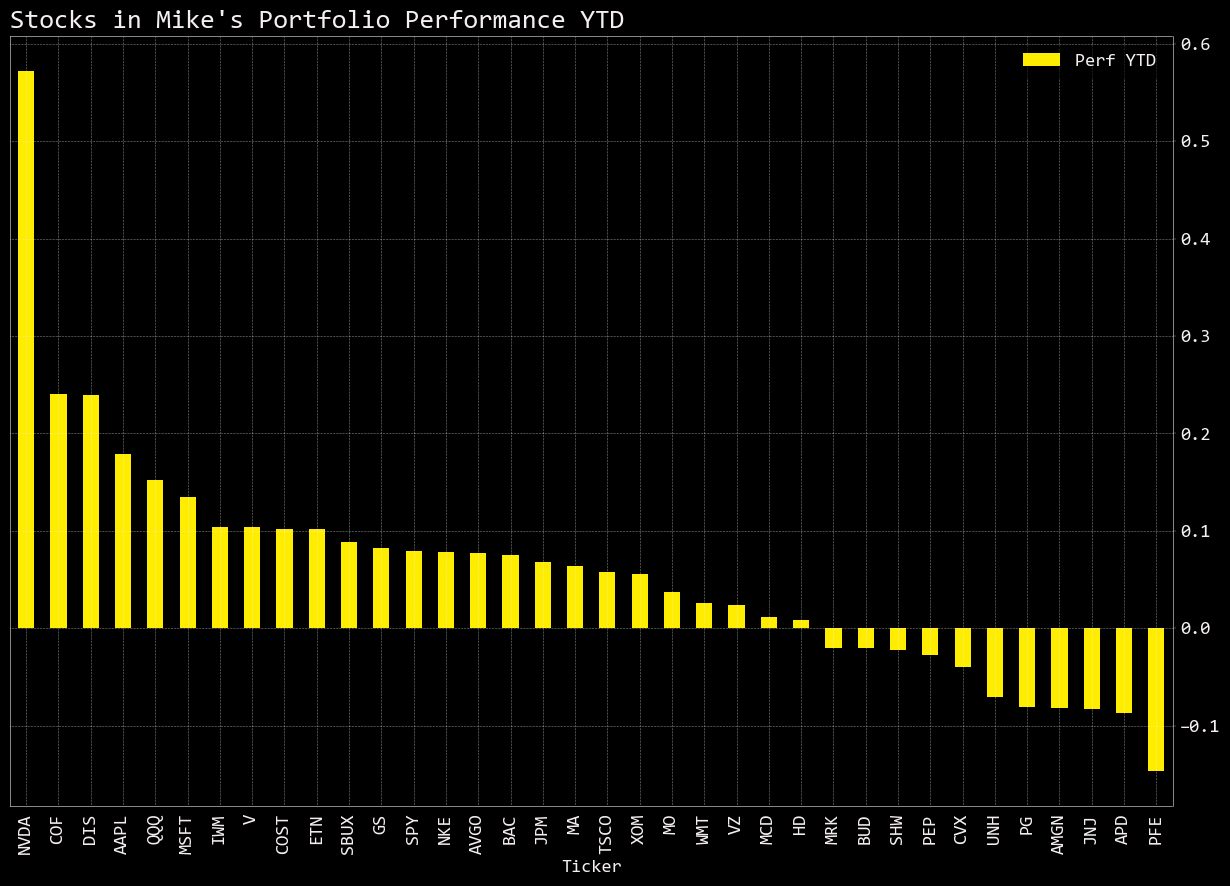

In [95]:
#Plotting the YTD Performance of the stock in the portfolio
mike_portfolio_performance.plot(
    kind="bar",
    x="Ticker", 
    y=["Perf YTD"],
    figsize=(15, 10),
    title="Stocks in Mike's Portfolio Performance YTD"

)

In [115]:
#Look at the Balance sheet of a few of the stocks in the portfolio
openbb.stocks.ca.balance(["NVDA", "COST", "MSFT", "SBUX"], timeframe = '2022')

Other available yearly timeframes are: 2018, 2019, 2020, 2021, 2022

,NVDA,COST,MSFT,SBUX
Item,,,,
Cash & Short Term Investments,21.21B,11.05B,104.76B,3.18B
Cash & Short Term Investments Growth,83.44%,-,-19.62%,-
Cash Only,1.99B,10.2B,13.93B,2.82B
Short-Term Investments,-,-,-,-
Cash & ST Investments / Total Assets,48.00%,17.22%,28.71%,11.38%
Total Accounts Receivable,4.65B,2.24B,44.26B,1.27B
Total Accounts Receivable Growth,91.44%,-,16.34%,-
"Accounts Receivables, Net",4.65B,-,44.26B,-
"Accounts Receivables, Gross",4.65B,-,44.89B,-


In [101]:
# Examine the divindends of Costco
cost_divs = openbb.stocks.fa.divs("COST")
cost_divs

,Dividends,Change
Date,,
2023-02-02 00:00:00-05:00,0.900,0.000
2022-10-27 00:00:00-04:00,0.900,0.000
2022-07-28 00:00:00-04:00,0.900,0.000
2022-04-28 00:00:00-04:00,0.900,0.110
2022-02-03 00:00:00-05:00,0.790,0.000
...,...,...
2005-05-04 00:00:00-04:00,0.115,0.015
2005-02-04 00:00:00-05:00,0.100,0.000
2004-11-03 00:00:00-05:00,0.100,0.000


<AxesSubplot: title={'left': 'Costco Dividends & Dividend Changes by Year (Log Scale)'}, xlabel='Date'>

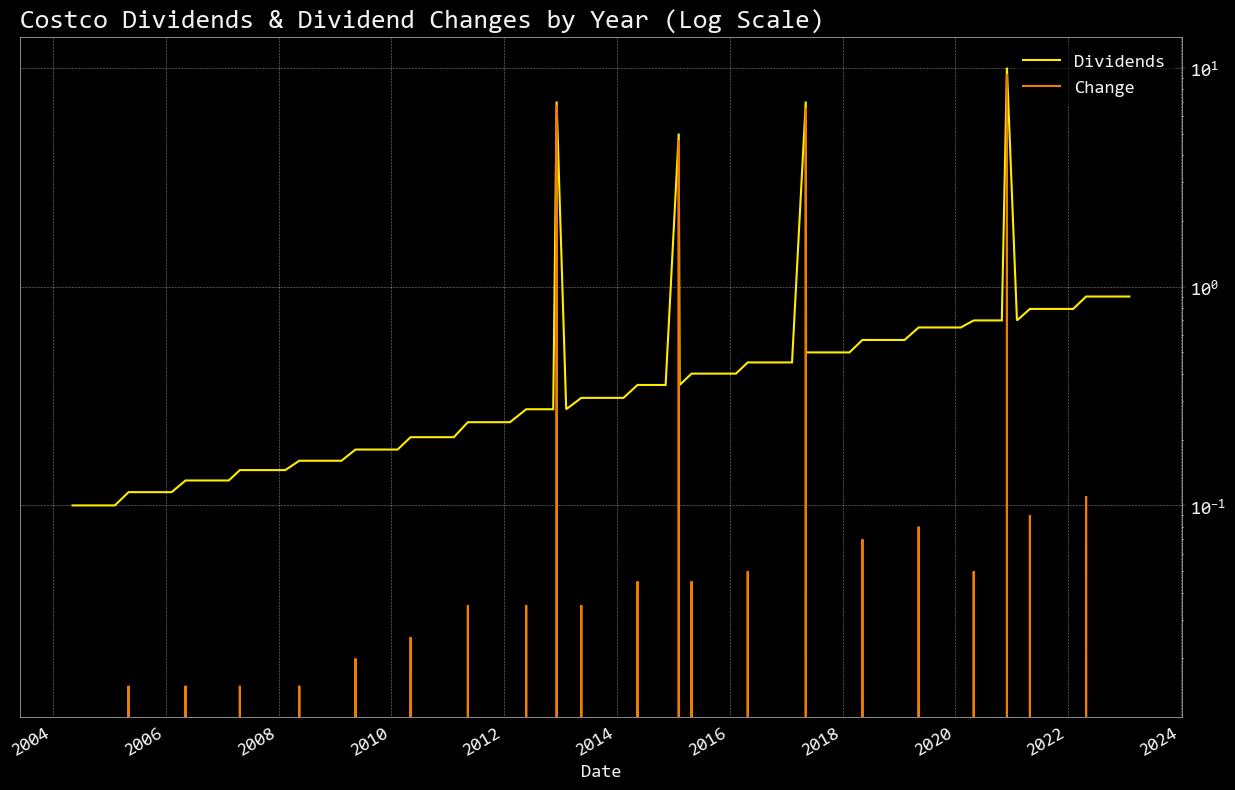

In [106]:
#Plot the dividends and changes in dividends of Costco overtime
cost_divs.plot(
    title="Costco Dividends & Dividend Changes by Year (Log Scale)",
    figsize = (15,10),
    logy=True


)

In [107]:
# News
cost_news = openbb.news(term = "Costco dividend increase")
cost_news

Fetching data. Please be patient

,title,link,published
23,"Earnings Previews: Cenovus Energy, Datadog, Pa...",https://news.google.com/rss/articles/CBMiZWh0d...,2023-02-14 16:47:05+00:00
18,Why the Highest Yielding Warren Buffett Stocks...,https://news.google.com/rss/articles/CBMieGh0d...,2023-02-14 11:49:05+00:00
22,Consumers suing to block grocery merger | Nort...,https://news.google.com/rss/articles/CBMieWh0d...,2023-02-14 08:00:00+00:00
13,Got $1000? 3 Simple Stocks to Buy Right Now - ...,https://news.google.com/rss/articles/CBMiTGh0d...,2023-02-10 10:40:00+00:00
2,Barclays Initiates Coverage of Costco Wholesal...,https://news.google.com/rss/articles/CBMidWh0d...,2023-02-09 04:07:00+00:00
...,...,...,...
19,Costco Just Raised Its Dividend. It's One More...,https://news.google.com/rss/articles/CBMiTmh0d...,2022-04-13 07:00:00+00:00
68,Costco Wholesale Corporation Announces an Incr...,https://news.google.com/rss/articles/CBMiXWh0d...,2022-04-13 07:00:00+00:00
84,Costco Stock: Is Another Stock Split Likely? W...,https://news.google.com/rss/articles/CBMiUGh0d...,2022-04-06 07:00:00+00:00
26,Is Costco Ready to Issue a Special Dividend? -...,https://news.google.com/rss/articles/CBMiVmh0d...,2022-03-15 07:00:00+00:00
